欢迎来到Quantopian！ 入门教程将指导您在Quantopian中研究和开发量化交易策略。 它涵盖了Quantopian API的许多基础知识，并且专为那些对该平台不熟悉的人士而设计。 你只需要学习一些基本的Python编程技巧就可以开始本教程。

# 什么是交易算法？

交易算法是一个计算机程序，它定义了一系列买卖资产的规则。大多数交易算法都是基于从历史数据上进行的研究得出的数学或统计模型做出决策。

## 从哪开始呢？

编写交易算法的第一步是找到一个经济或统计关系，我们可以根据这个关系来制定我们的战略。 为此，我们可以使用Quantopian的研究环境来访问和分析平台中可用的历史数据集。 Research是Jupyter Notebook环境，它允许我们以称为“单元”的单位运行Python代码。 例如，以下代码绘制了Apple Inc.（AAPL）的每日收盘价以及20和50日移动平均线：
(更改为美的集团)

In [1]:
%matplotlib inline

In [2]:
from zipline.research import symbols

In [3]:
symbols(['000333',2,'600645',600771])

[美的集团(000333), 万 科Ａ(000002), 中源协和(600645), 广誉远(600771)]

## 查询单个股票

In [4]:
# Research environment functions
from zipline.research import prices

# Pandas library: https://pandas.pydata.org/
import pandas as pd

# 美的查询历史数据
mdjt_close = prices(
    '000333',
    start='2018-01-01',
    end='2018-05-18',
)

[2018-05-21 09:42:26.738331] INFO: zipline.finance.metrics.tracker: Simulated 1 trading days
first open: 2018-05-18 01:31:00+00:00
last close: 2018-05-18 07:00:00+00:00


In [5]:
# 单个股票，返回Series
mdjt_close.tail()

2018-05-14 00:00:00+00:00    55.24
2018-05-15 00:00:00+00:00    55.22
2018-05-16 00:00:00+00:00    54.40
2018-05-17 00:00:00+00:00    53.12
2018-05-18 00:00:00+00:00    53.89
Freq: C, Name: 美的集团(000333), dtype: float64

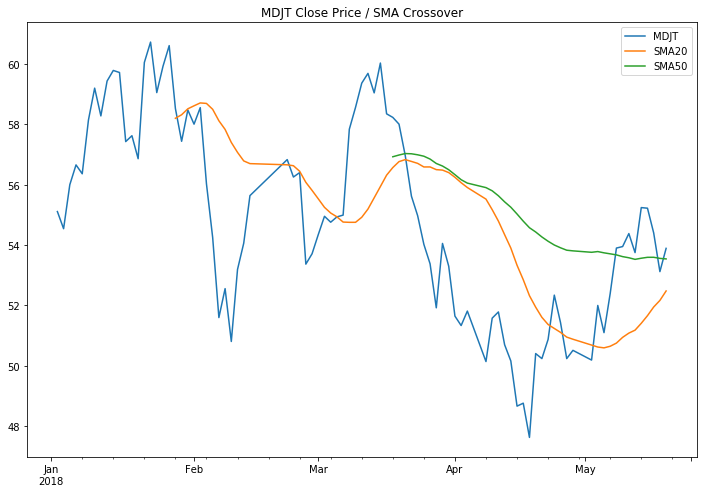

In [6]:
# 计算20天与50天移动平均
sma20 = mdjt_close.rolling(20).mean()
sma50 = mdjt_close.rolling(50).mean()

# Combine results into a pandas DataFrame and plot

pd.DataFrame(
    {
        'MDJT': mdjt_close.values,
        'SMA20': sma20.values,
        'SMA50': sma50.values
    },
    index=mdjt_close.index,
).plot(title='MDJT Close Price / SMA Crossover',figsize=(12,8))

## 多个股票

In [7]:
closes = prices(
    ['000333','600645'],
    start='2018-01-01',
    end='2018-05-18',
)

[2018-05-21 09:42:28.235907] INFO: zipline.finance.metrics.tracker: Simulated 1 trading days
first open: 2018-05-18 01:31:00+00:00
last close: 2018-05-18 07:00:00+00:00


In [8]:
closes.head()

,美的集团(000333),中源协和(600645)
2018-01-02 00:00:00+00:00,55.108,28.4
2018-01-03 00:00:00+00:00,54.541,28.4
2018-01-04 00:00:00+00:00,55.998,28.4
2018-01-05 00:00:00+00:00,56.653,28.4
2018-01-08 00:00:00+00:00,56.359,28.4
